In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house_ml.csv')

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,day,year,quarter,age
0,221900.0,3,1,1180,5650,1,0,0,3,7,...,0,47.5112,-122.257,1340,5650,10,13,2014,4,59
1,538000.0,3,2,2570,7242,2,0,0,3,7,...,400,47.7210,-122.319,1690,7639,12,9,2014,4,63
2,180000.0,2,1,770,10000,1,0,0,3,6,...,0,47.7379,-122.233,2720,8062,2,25,2015,1,82
3,604000.0,4,3,1960,5000,1,0,0,5,7,...,910,47.5208,-122.393,1360,5000,12,9,2014,4,49
4,510000.0,3,2,1680,8080,1,0,0,3,8,...,0,47.6168,-122.045,1800,7503,2,18,2015,1,28


# preprocessing 

In [4]:
X=df.drop(columns='price')
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,day,year,quarter,age
0,3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,10,13,2014,4,59
1,3,2,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,12,9,2014,4,63
2,2,1,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,2,25,2015,1,82
3,4,3,1960,5000,1,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,12,9,2014,4,49
4,3,2,1680,8080,1,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2,18,2015,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19909,4,3,3510,7200,2,0,0,3,9,2600,910,47.5537,-122.398,2050,6200,3,26,2015,1,6
19910,3,2,1310,1294,2,0,0,3,8,1180,130,47.5773,-122.409,1330,1265,2,19,2015,1,7
19911,3,2,1530,1131,3,0,0,3,8,1530,0,47.6993,-122.346,1530,1509,5,21,2014,2,5
19912,4,2,2310,5813,2,0,0,3,8,2310,0,47.5107,-122.362,1830,7200,2,23,2015,1,1


In [5]:
y=df['price']
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
           ...    
19909    1007500.0
19910     475000.0
19911     360000.0
19912     400000.0
19913     400000.0
Name: price, Length: 19914, dtype: float64

# Modeling

In [6]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.svm             import SVR
from sklearn.metrics         import r2_score,mean_absolute_error,confusion_matrix
from sklearn.preprocessing   import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.decomposition   import PCA

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=8)

In [37]:
sc = StandardScaler()
ms = MinMaxScaler()

pca = PCA(n_components=.7)

In [38]:
X= sc.fit_transform(X)
# X= ms.fit_transform(X)
# X= pca.fit_transform(X)

In [44]:
poly= PolynomialFeatures(degree=2)
x = poly.fit_transform(X) 

# LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
train = model.predict(X_train)
test = model.predict(X_test)

In [48]:
print(f'train {r2_score(y_true=y_train,y_pred=train)}')
print(f'test {r2_score(y_true=y_test,y_pred=test)}')
print()
cross = cross_val_score(model,X_train,y_train)
print(cross.mean())
# print(mean_absolute_error(y_test,y_pred))


train 0.6965152599979705
test 0.6821237389805823

0.6949648382634708


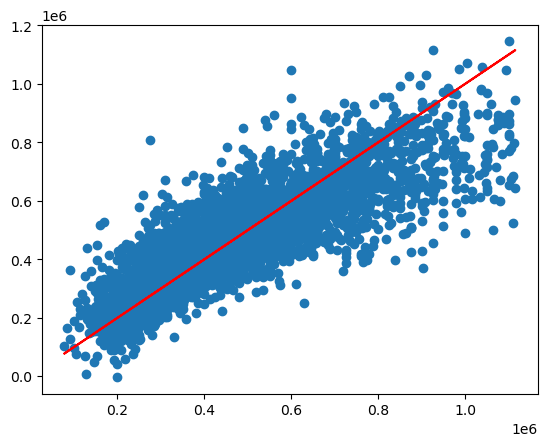

In [49]:
plt.scatter(y_test,model.predict(X_test))
plt.plot(y_test,y_test,'r');

# DecisionTreeRegressor

In [50]:
tree = DecisionTreeRegressor(max_depth=150,min_samples_leaf=10,criterion='friedman_mse')

In [51]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=150,
                      min_samples_leaf=10)

In [52]:
train = tree.predict(X_train)
test = tree.predict(X_test)

In [53]:
print(f'train {r2_score(y_true=y_train,y_pred=train)}')
print(f'test {r2_score(y_true=y_test,y_pred=test)}')
print()
cross = cross_val_score(tree,X,y)
print(cross.mean())
# print(mean_absolute_error(y_test,y_pred))


train 0.8965256142156179
test 0.7945821367972867

0.7843695622346025


# RandomForestRegressor

In [54]:
random = RandomForestRegressor(criterion='poisson')

In [55]:
random.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson')

In [56]:
test = random.predict(X_test)
train = random.predict(X_train)

In [57]:
print(f'train {r2_score(y_true=y_train,y_pred=train)}')
print(f'test {r2_score(y_true=y_test,y_pred=test)}')
print()
cross = cross_val_score(random,X,y)
print(cross.mean())
# print(mean_absolute_error(y_test,y_pred))

train 0.9801688635506174
test 0.8596672344705907

0.8566070442072059


# KNeighborsRegressor

In [58]:
neighbor = KNeighborsRegressor(n_neighbors=28)

In [59]:
neighbor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=28)

In [60]:
test = neighbor.predict(X_test)
train = neighbor.predict(X_train)

In [61]:
print(f'train {r2_score(y_true=y_train,y_pred=train)}')
print(f'train {r2_score(y_true=y_test,y_pred=test)}')
cross = cross_val_score(neighbor,X,y)
print(cross.mean())
# print(mean_absolute_error(y_test,y_pred))


train 0.749382256550829
train 0.7184985717194492
0.7280635928094394


# SVM

In [62]:
svr = SVR()

In [63]:
# svr.fit(X_train,y_train)

In [64]:
# y_pred =svr.predict(X_test)
# print(r2_score(y_test,y_pred))

# print(mean_absolute_error(y_test,y_pred))

https://www.kaggle.com/code/omarshaaban2/house-sales-in-king-county-with-tunning-params#Random-Forest

In [ ]:
### there are two possibilty way i cna handel this data set 1- detect outlirs if there and delete it 2- tuning paramiter